In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

housing = pd.read_csv('train.csv', delimiter = ',')
housing2 = housing.copy()

In [2]:
test = pd.read_csv('test.csv', delimiter = ',')

**Notes**

Possibly correlated and problematic:
- Condition1, Condition2
    - Condition1 is proximity to 1 condition
    - Condition2 is proximity to 1 or more conditions
- OverallQual, OverallCond
    - When either one is high, you can expect the other to be high as well and vice versa
    - Good expensive material is usually of great quality, therefore the condition of the house is also likely to
      be good as well
    - It's rare for a house to have amazing quality/finish yet the overall condition of the house is
      poor
- ExterQual, ExterCond
    - Same reasons as above Overall
- Number of Fireplaces might have very little to do with house sale price, could possibly change to 0 and 1 for the
  presence of a fireplace or not and see if that is a better predictor
- GarageCars, GarageArea
- SaleType, SaleCondition

Preliminary Selection of Important Features
- Neighborhood, YearBuilt, LotArea, LotFrontage, OverallCond/Qual, Central Air, 1stFlrSF, 2ndFlrSF
- 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


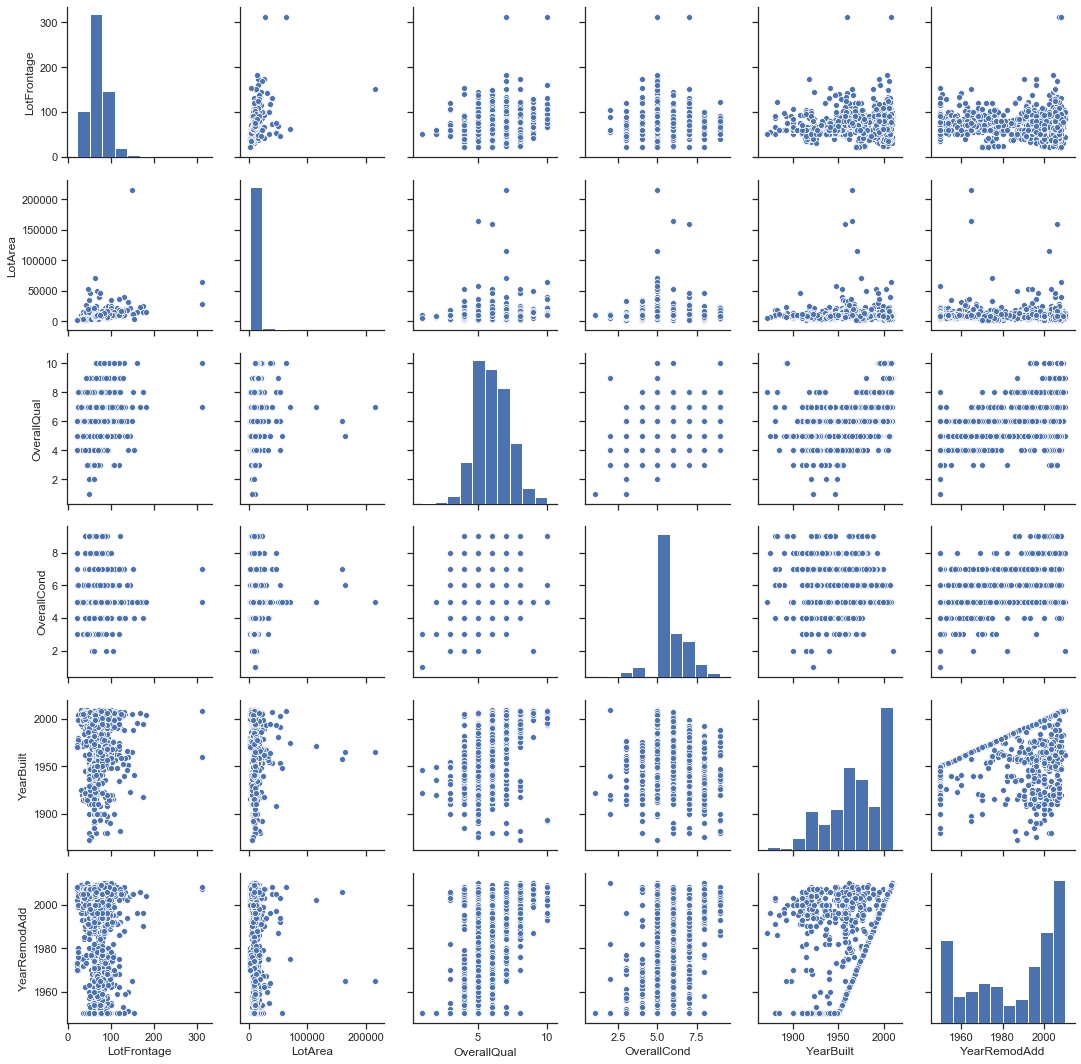

In [15]:
# Script to view EDA plots
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import numpy as np
import pandas as pd

housing3 = housing2.iloc[ : , 2:25] # expand/change the column range to see more plots or different plots

# prints out plots of only numerical columns
g = sns.pairplot(housing3)

In [4]:
housing2.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
# # Get column names
# column_names = housing2.columns
# print(column_names)
# Get column data types
housing2.dtypes[housing2.dtypes == 'float']

# lot frontage, going to bin by lot area
# garageYrBlt, yr house built, drop it later if necessary
# MasVnrArea

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

LotFrontage       259, float64, linear feet of street connected to property (feet)
Alley            1369, object, type of alley access to property (gravel, paved, none)
MasVnrType          8, object, 
MasVnrArea          8, float64, 
BsmtQual           37, int64, 
BsmtCond           37, int64, 
BsmtExposure       38, object,
BsmtFinType1       37, object,
BsmtFinType2       38, object,
Electrical          1, object,
FireplaceQu       690, object,
GarageType         81, object,
GarageYrBlt        81, float64, 
GarageFinish       81, object,
GarageQual         81, int64, 
GarageCond         81, int64, 
PoolQC           1453, object,
Fence            1179, object,
MiscFeature      1406, object,

Int64 Columns with No Missing Values

Lot Area         int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64

Float Columns with No Missing Values
All 3 columns have missing values (


In [6]:
train_null = housing2.isna().sum()
train_null[(train_null>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
test_null = test.isna().sum()
test_null[(test_null > 0)]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [10]:
test.select_dtypes(['float']).isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [66]:
test.MasVnrType[test.MasVnrArea.isna()].fillna('None')

231     None
246     None
422     None
532     None
544     None
581     None
851     None
865     None
880     None
889     None
908     None
1132    None
1197    None
1226    None
1402    None
Name: MasVnrType, dtype: object

In [114]:
housing2.select_dtypes(['float']).isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
LotAreaBin      23
dtype: int64

In [131]:
# NA's = 1, Id: 2121, row index 660
test[test.BsmtFinSF1.isna()]
test[test.BsmtFinSF2.isna()]
test[test.BsmtUnfSF.isna()]
test[test.TotalBsmtSF.isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

In [130]:
# NA's = 1, Id: 1116, row index 2577
test[test.GarageCars.isna()]
test[test.GarageArea.isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1116         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1116       Norm     1Fam     2Story            5            6       1923   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1116          1999     Gable  CompShg     Wd Sdng     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1116         0.0        TA        TA     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1116           No          ALQ       548.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1116      311.0        859.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1116       942       886             0       1828           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1116         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1116             6        Typ           0         NaN     Detchd          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1116          NaN         NaN         NaN        NaN        NaN          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1116         174            0            212          0            0   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1116         0    NaN  MnPrv         NaN        0       3    2007       WD   

     SaleCondition  
1116        Alloca

In [29]:
# NA's = 2, Id: , row index 
test[test.BsmtFullBath.isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   
728  2189          20       RL        123.0    47007   Pave   NaN      IR1   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
660         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
728         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
660       0      4    2008     ConLD        Abnorml  
728       0      7    2008        WD         Normal  

[2 rows x 80 columns]

In [31]:
test[test.BsmtHalfBath.isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   
728  2189          20       RL        123.0    47007   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   
728          1996     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc      NaN      NaN          NaN   
728         0.0        TA        TA       Slab      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660          NaN         NaN          NaN         NaN        NaN          NaN   
728          NaN         0.0          NaN         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   
728          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml  
728       7    2008       WD        Normal

In [169]:
test.MasVnrArea = test.MasVnrArea.fillna(0.0)

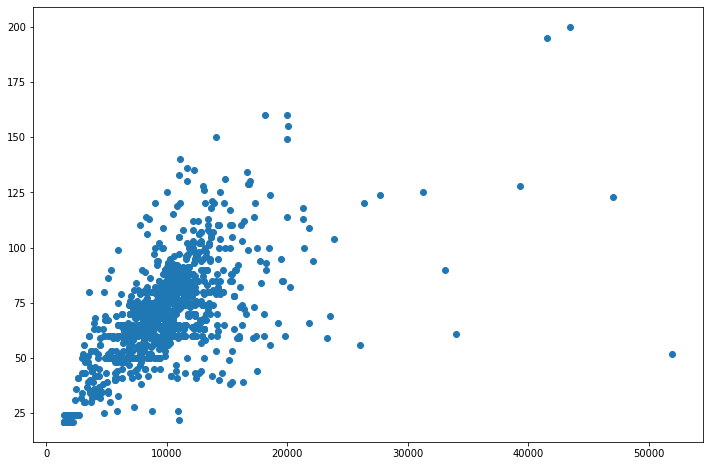

In [33]:
plt.scatter(test.LotArea, test.LotFrontage)

In [163]:
imputation_dict = test[test.LotFrontage.notna()].groupby('LotAreaBin').mean().to_dict()

In [164]:
imputation_dict['LotFrontage']

{Interval(1414.87, 6481.818, closed='right'): 43.74583333333333,
 Interval(6481.818, 11493.636, closed='right'): 69.56338028169014,
 Interval(11493.636, 16505.455, closed='right'): 84.07423580786026,
 Interval(16505.455, 21517.273, closed='right'): 99.27777777777777,
 Interval(21517.273, 26529.091, closed='right'): 84.625,
 Interval(26529.091, 31540.909, closed='right'): 124.5,
 Interval(31540.909, 36552.727, closed='right'): 75.5,
 Interval(36552.727, 41564.545, closed='right'): 128.0,
 Interval(41564.545, 46576.364, closed='right'): 197.5,
 Interval(46576.364, 51588.182, closed='right'): 123.0,
 Interval(51588.182, 56600.0, closed='right'): 52.0}

In [109]:
missingRowIndexes = test.LotFrontage.isnull()

In [90]:
test[missingRowIndexes]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
52    1513          80       RL          NaN    10600   Pave  Pave      IR1   
59    1520          20       RL          NaN     8050   Pave   NaN      IR1   
75    1536          50       RM          NaN     8239   Pave   NaN      Reg   
82    1543          75       RL          NaN     7793   Pave   NaN      IR1   
98    1559          70  C (all)          NaN     6449   Pave   NaN      IR1   
103   1564          90       RL          NaN     7424   Pave   NaN      IR1   
105   1566          20       RL          NaN    20062   Pave   NaN      IR1   
107   1568          60       RL          NaN    17082   Pave   NaN      IR1   
113   1574          20       RL          NaN    11200   Pave   NaN      IR1   
119   1580          60       RL          NaN     9337   Pave   NaN      IR1   
124   1585         120       RM          NaN     4435   Pave   NaN      Reg   
132   1593          30       RL          NaN     7890   Pave   NaN      Reg   
146   1607          90       RL          NaN    12760   Pave   NaN      IR1   
152   1613          20       RL          NaN    11875   Pave   NaN      Reg   
167   1628          60       RL          NaN    11792   Pave   NaN      IR1   
174   1635          60       RL          NaN     8803   Pave   NaN      IR1   
177   1638          60       RL          NaN    13250   Pave   NaN      IR1   
179   1640          60       RL          NaN    12388   Pave   NaN      IR1   
182   1643          60       FV          NaN     7500   Pave   NaN      Reg   
183   1644          60       FV          NaN     8470   Pave   NaN      Reg   
184   1645          20       RL          NaN     9373   Pave   NaN      IR1   
187   1648          20       RL          NaN     7830   Pave   NaN      IR1   
188   1649          20       RL          NaN     8510   Pave   NaN      IR1   
199   1660          20       RL          NaN    10710   Pave   NaN      Reg   
229   1690          60       RL          NaN     8965   Pave   NaN      IR1   
230   1691          60       RL          NaN     8174   Pave   NaN      IR1   
231   1692          60       RL          NaN    12891   Pave   NaN      IR1   
235   1696          60       RL          NaN    15896   Pave   NaN      IR2   
238   1699          20       RL          NaN    10750   Pave   NaN      IR1   
240   1701          60       RL          NaN    11692   Pave   NaN      IR1   
268   1729          60       RL          NaN    10274   Pave   NaN      IR1   
271   1732          20       RL          NaN     8499   Pave   NaN      IR1   
272   1733          20       RL          NaN     9079   Pave   NaN      IR1   
273   1734          20       RL          NaN     9316   Pave   NaN      IR1   
274   1735          20       RL          NaN     7791   Pave   NaN      IR1   
276   1737          20       RL          NaN    15676   Pave   NaN      IR1   
277   1738          60       RL          NaN    11949   Pave   NaN      Reg   
279   1740         120       FV          NaN     3830   Pave  Pave      IR1   
280   1741         120       FV          NaN     4217   Pave  Pave      IR1   
283   1744          20       RL          NaN    14694   Pave   NaN      IR1   
286   1747          60       RL          NaN    12732   Pave   NaN      IR1   
290   1751          60       RL          NaN    13774   Pave   NaN      IR1   
294   1755          85       RL          NaN    16500   Pave   NaN      Reg   
297   1758          20       RL          NaN     9450   Pave   NaN      IR1   
298   1759          20       RL          NaN    13495   Pa

In [177]:
# impute the value by using the above imputation_dict
test.loc[missingRowIndexes, 'LotFrontage'] = test[missingRowIndexes].apply(lambda x: imputation_dict['LotFrontage'][x.LotAreaBin], axis = 1)

In [186]:
test = test.drop('LotFrontageBin', axis=1)

In [194]:
test.select_dtypes('float').columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [196]:
for col in test.select_dtypes('float').columns:
    if (col == 'LotFrontage'):
        test['LotAreaBin'] = pd.cut(test.LotArea, 11)
        imputation_dict = test[test.LotFrontage.notna()].groupby('LotAreaBin').mean().to_dict()
        missingRowIndexes = test.LotFrontage.isnull()
        test.loc[missingRowIndexes, 'LotFrontage'] = test[missingRowIndexes].apply(lambda x: imputation_dict['LotFrontage'][x.LotAreaBin], axis=1)
    elif (col == 'GarageYrBlt'):
        test[col] = test[col].fillna(test.YearBuilt[test[col].isna()]) # convert garageyrblt NA's to YearBuilt
    else:
        test[col] = test[col].fillna(0.0)

In [151]:
test[test.TotalBsmtSF.isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660          NaN         NaN          NaN         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml

In [206]:
test.groupby('ExterQual')['Id'].count()

ExterQual
Ex     55
Fa     21
Gd    491
TA    892
Name: Id, dtype: int64

In [215]:
test[test.ExterQual == 'TA'].groupby('Exterior1st')['Id'].count()

Exterior1st
AsbShng     18
BrkComm      3
BrkFace     30
CBlock       1
CemntBd     24
HdBoard    185
MetalSd    172
Plywood    100
Stucco      10
VinylSd    145
Wd Sdng    183
WdShing     20
Name: Id, dtype: int64

In [118]:
test.select_dtypes('float').isna().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [122]:
housing.select_dtypes('object').isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [113]:
housing.select_dtypes('float').isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [120]:
housing[housing.MasVnrArea.isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
529           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
936           2003     Gable  CompShg     VinylSd     VinylSd        NaN   
973           2008     Gable  CompShg     CemntBd     CmentBd        NaN   
977           2007     Gable  CompShg     VinylSd     VinylSd        NaN   
1243          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0  

In [112]:
test[test.GarageArea == 0]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53    1514          90       RL    98.000000    13260   Pave   NaN      IR1   
71    1532          30       RM    56.000000     4485   Pave  Grvl      Reg   
79    1540         190       RM   100.000000     9045   Pave   NaN      Reg   
92    1553          70       RM    60.000000    12900   Pave  Grvl      Reg   
96    1557         190       RL    60.000000     9900   Pave   NaN      Reg   
98    1559          70  C (all)    74.303030     6449   Pave   NaN      IR1   
100   1561          90       RL    72.000000    10773   Pave   NaN      Reg   
130   1591          20       RL    64.000000     6410   Pave   NaN      Reg   
133   1594          90       RH    60.000000     7200   Pave  Pave      Reg   
134   1595          50       RL    51.000000     9839   Pave   NaN      Reg   
154   1615         160       RM    21.000000     1476   Pave   NaN      Reg   
155   1616         160       RM    21.000000     1900   Pave   NaN      Reg   
257   1718          20       RL    63.000000     7500   Pave   NaN      Reg   
261   1722          20       RL    63.000000    13072   Pave   NaN      Reg   
327   1788          30       RL    90.000000     5400   Pave   NaN      Reg   
348   1809          70       RM    90.000000     9900   Pave   NaN      Reg   
350   1811         190       RM    63.000000     7627   Pave   NaN      Reg   
351   1812          50       RM    56.000000    10134   Pave  Grvl      Reg   
359   1820          30  C (all)    66.664384     3300   Pave   NaN      Reg   
362   1823          30  C (all)    72.000000     9392   Pave   NaN      Reg   
371   1832          90       RM    50.000000     3000   Pave  Grvl      Reg   
374   1835         190       RM    41.000000     5852   Pave   NaN      IR3   
376   1837          85       RM    86.000000     5160   Pave  Grvl      Reg   
379   1840          90       RL    60.000000    10800   Pave   NaN      Reg   
387   1848          20       RL    66.664384     9000   Pave   NaN      Reg   
433   1894          90       RL    65.000000    10926   Pave   NaN      Reg   
550   2011          20       RL    63.000000    13072   Pave   NaN      Reg   
621   2082          90       RL   113.000000     8513   Pave   NaN      Reg   
630   2091         190       RM    63.000000    11426   Pave  Grvl      Reg   
633   2094          30       RM    60.000000     5400   Pave   NaN      Reg   
636   2097          50       RM    44.000000     5914   Pave  Grvl      Reg   
639   2100          20       RM   103.000000    12205   Pave   NaN      Reg   
644   2105          70       RM    60.000000     6000   Pave  Grvl      Reg   
675   2136         190       RM    60.000000    10320   Pave  Grvl      Reg   
691   2152          30       RL    85.000000    19550   Pave   NaN      Reg   
693   2154          90       RL    50.000000     9350   Pave   NaN      Reg   
729   2190          90       RL    65.000000     6012   Pave   NaN      Reg   
730   2191          90       RL    74.000000     6845   Pave   NaN      Reg   
731   2192         190       RL    56.000000     6931   Pave   NaN      Reg   
732   2193          50       RL    60.000000    12180   Pave   NaN      Reg   
733   2194          50       RL    57.000000     8050   Pave   NaN      Reg   
752   2213          50       RM    58.000000     8155   Pave   NaN      Reg   
778   2239          20       RL    77.000000     9278   Pave   NaN      Reg   
786   2247         160       RM    21.000000     1477   Pave   NaN      Reg   
893   2354          20       RL    63.000000     7500   Pave   NaN      Reg   
894   2355          20       RL    63.000000     7500   Pave   NaN      Reg   
938   2399          20       RL    50.000000     5000   Pave   NaN      Reg   
939   2400          50       RL    51.000000     3500   Pave   NaN      Reg   
962   2423          50       RL    60.000000    14190   Pave   NaN      Reg   
966   2427          70       RL    60.000000    10800   Pa

In [5]:
# test set cleaning script
def clean_data(df):
    # Filter out all houses (approx. 17%) that were not sold under "Normal" conditions -> most likely outliers
    df = df[df.SaleCondition == 'Normal']
    
    # Drop columns (and associate columns) with more than 1100 missing values
    df = df.drop(['Alley', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'], axis=1)
    
    # Clean all float type columns with missing values, ignore ints (no missings anyways) and objects
    # Fill missing LotFrontage with average frontage grouped by LotShape
    missingRowIndexes = list(df[df.LotFrontage.isna()].index)
    imp_dict = df.groupby('LotShape')[['LotFrontage']].mean().round(2).to_dict()
    df.loc[missingRowIndexes, 'LotFrontage'] = df.loc[missingRowIndexes].apply(lambda x: imp_dict['LotFrontage'][x.LotShape], axis = 1)
    
    # Fill missing MasVnrType with None and corresponding MasVnrArea with 0.0
    missingRowIndexes = list(df[df.MasVnrType.isna()].index)
    df.loc[missingRowIndexes, 'MasVnrType'] = df.loc[missingRowIndexes, 'MasVnrType'].fillna('None')
    missingRowIndexes = list(df[df.MasVnrArea.isna()].index)
    df.loc[missingRowIndexes, 'MasVnrArea'] = df.loc[missingRowIndexes, 'MasVnrArea'].fillna(0.0)
    
    # Fill missing BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF with 0.0
    df.BsmtFinSF1[df.BsmtFinType1.isna()].fillna(0.0)
    df.BsmtFinSF2[df.BsmtFinType2.isna()].fillna(0.0)
    df.BsmtUnfSF[df.BsmtUnfSF.isna()].fillna(0.0)
    df.TotalBsmtSF[df.TotalBsmtSF.isna()].fillna(0.0)
    
    # Fill missing BsmtFullBath, BsmtHalfBath
    missingRowIndexes = list(df[df.BsmtFullBath.isna()].index)
    df.loc[missingRowIndexes, 'BsmtFullBath'] = df.loc[missingRowIndexes, 'BsmtFullBath'].fillna(0.0)
    missingRowIndexes = list(df[df.BsmtHalfBath.isna()].index)
    df.loc[missingRowIndexes, 'BsmtHalfBath'] = df.loc[missingRowIndexes, 'BsmtHalfBath'].fillna(0.0)
    
    # Fill missing GarageCars (car capacity), GarageArea (square footage)
    df.GarageCars[df.GarageCars.isna()].fillna(0.0, inplace=True)
    df.GarageArea[df.GarageArea.isna()].fillna(0.0, inplace=True)
    
    return df # only float column with NA's remaining is GarageYrBlt which is NA for houses without a garage

# clean train and test datasets from Kaggle
train_clean = clean_data(housing)
test_clean = clean_data(test)

# Convert to csv files
train_clean.to_csv('train_clean_data.csv')
test_clean.to_csv('test_clean_data.csv')

In [8]:
test_clean.isna().sum()

Id                 0
MSSubClass         0
MSZoning           3
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          36
BsmtCond          37
BsmtExposure      35
BsmtFinType1      34
BsmtFinSF1         0
BsmtFinType2      34
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [158]:
newtest = clean_data(housing)
newtest

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
5        6          50       RL        85.00    14115   Pave   NaN      IR1   
6        7          20       RL        75.00    10084   Pave   NaN      Reg   
7        8          60       RL        76.06    10382   Pave   NaN      IR1   
9       10         190       RL        50.00     7420   Pave   NaN      Reg   
10      11          20       RL        70.00    11200   Pave   NaN      Reg   
12      13          20       RL        80.14    12968   Pave   NaN      IR2   
14      15          20       RL        76.06    10920   Pave   NaN      IR1   
15      16          45       RM        51.00     6120   Pave   NaN      Reg   
16      17          20       RL        76.06    11241   Pave   NaN      IR1   
17      18          90       RL        72.00    10791   Pave   NaN      Reg   
18      19          20       RL        66.00    13695   Pave   NaN      Reg   
21      22          45       RM        57.00     7449   Pave  Grvl      Reg   
22      23          20       RL        75.00     9742   Pave   NaN      Reg   
23      24         120       RM        44.00     4224   Pave   NaN      Reg   
24      25          20       RL        76.06     8246   Pave   NaN      IR1   
25      26          20       RL       110.00    14230   Pave   NaN      Reg   
26      27          20       RL        60.00     7200   Pave   NaN      Reg   
27      28          20       RL        98.00    11478   Pave   NaN      Reg   
28      29          20       RL        47.00    16321   Pave   NaN      IR1   
29      30          30       RM        60.00     6324   Pave   NaN      IR1   
30      31          70  C (all)        50.00     8500   Pave  Pave      Reg   
31      32          20       RL        76.06     8544   Pave   NaN      IR1   
32      33          20       RL        85.00    11049   Pave   NaN      Reg   
33      34          20       RL        70.00    10552   Pave   NaN      IR1   
34      35         120       RL        60.00     7313   Pave   NaN      Reg   
35      36          60       RL       108.00    13418   Pave   NaN      Reg   
36      37          20       RL       112.00    10859   Pave   NaN      Reg   
37      38          20       RL        74.00     8532   Pave   NaN      Reg   
41      42          20       RL       115.00    16905   Pave   NaN      Reg   
42      43          85       RL        76.06     9180   Pave   NaN      IR1   
43      44          20       RL        76.06     9200   Pave   NaN      IR1   
44      45          20       RL        70.00     7945   Pave   NaN      Reg   
45      46         120       RL        61.00     7658   Pave   NaN      Reg   
47      48          20       FV        84.00    11096   Pave   NaN      Reg   
49      50          20       RL        66.00     7742   Pave   NaN      Reg   
50      51          60       RL        80.14    13869   Pave   NaN      IR2   
51      52          50       RM        52.00     6240   Pave   NaN      Reg   
52      53          90       RM       110.00     8472   Grvl   NaN      IR2   
53      54          20       RL        68.00    50271   Pave   NaN      IR1   
54      55          80       RL        60.00     7134   Pave   NaN      Reg   
55      56          20       RL       100.00    10175   Pave   NaN      IR1   
57      58          60       RL        89.00    11645   Pave   NaN      IR1   
59      60          20       RL        60.00     7200   Pave   NaN      Reg   
61      62          75       RM        60.00     7200   Pave   NaN      Reg   
62      63         120       RL        44.00     6442   Pave   NaN      IR1   
63      64          70       RM        50.00    10300   Pa

In [159]:
newtest.select_dtypes('float').isna().sum()

LotFrontage     0
MasVnrArea      0
GarageYrBlt    61
dtype: int64

In [13]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d7890d0>,
      dtype=object)

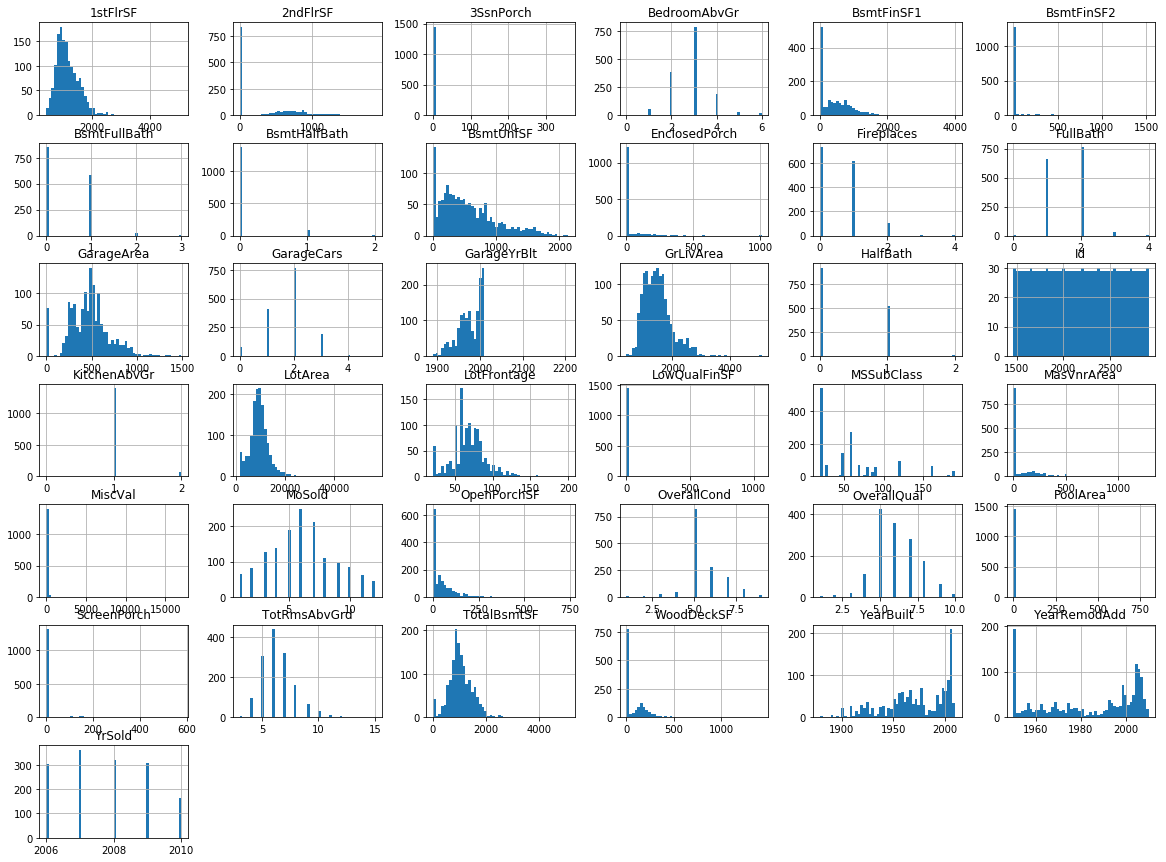

In [221]:
test.hist(bins=50, figsize=(20,15))

In [59]:
missingRowIndexes = test.LotFrontage.isnull()
imp_dict = test.groupby('LotShape')[['LotFrontage']].mean().to_dict()
test.loc[missingRowIndexes, 'LotFrontage'] = test[missingRowIndexes].apply(lambda x: imp_dict['LotFrontage'][x.LotShape], axis = 1)

In [56]:
imp_dict

{'LotFrontage': {'IR1': 74.3030303030303,
  'IR2': 56.72727272727273,
  'IR3': 81.25,
  'Reg': 66.66438356164383}}